<a href="https://colab.research.google.com/github/PhoebeLu1011/1132code/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gspread_dataframe import set_with_dataframe

In [90]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [105]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1s9cLAtQ2iOLeuEMiaeDLCa1KNJLc9zgBj3MwCv1aTtM/edit?usp=sharing')

In [106]:
gsheets

<Spreadsheet '作業二' id:1s9cLAtQ2iOLeuEMiaeDLCa1KNJLc9zgBj3MwCv1aTtM>

In [107]:
from gspread_dataframe import set_with_dataframe

# 選擇要更新的工作表（選擇第一個工作表）
worksheet = gsheets.get_worksheet(0)  # 如果是其他工作表，可以用 get_worksheet(index)

In [108]:
data = worksheet.get_all_values()

In [109]:
from google.colab import userdata
apikey = userdata.get('GOOGLE_API_KEY')

In [110]:
# 取得 Google Sheets 內容
data = worksheet.get_all_values()
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df[1:]

In [111]:
df

,PatientID,Age,BMI,Disease,Medication,Rehabilitation,FollowUp
1,P0001,55,23.3,Arthritis,1,0,1
2,P0002,43,27,Chronic Back Pain,0,1,1
3,P0003,83,18.7,No Specific Condition,0,0,0
4,P0004,45,28.1,Hypertension,1,0,1
5,P0005,40,29.9,Diabetes,0,0,1
...,...,...,...,...,...,...,...
146,P0146,37,21.8,Diabetes,1,0,1
147,P0147,78,24.3,No Specific Condition,0,0,1
148,P0148,64,27.9,Arthritis,1,1,1
149,P0149,42,24,Diabetes,1,0,1


In [132]:
df["Medication"] = df["Medication"].astype(int)
df["Rehabilitation"] = df["Rehabilitation"].astype(int)
df["FollowUp"] = df["FollowUp"].astype(int)

<ipython-input-133-480ac1283d28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Disease", order=df["Disease"].value_counts().index, palette="Set2")


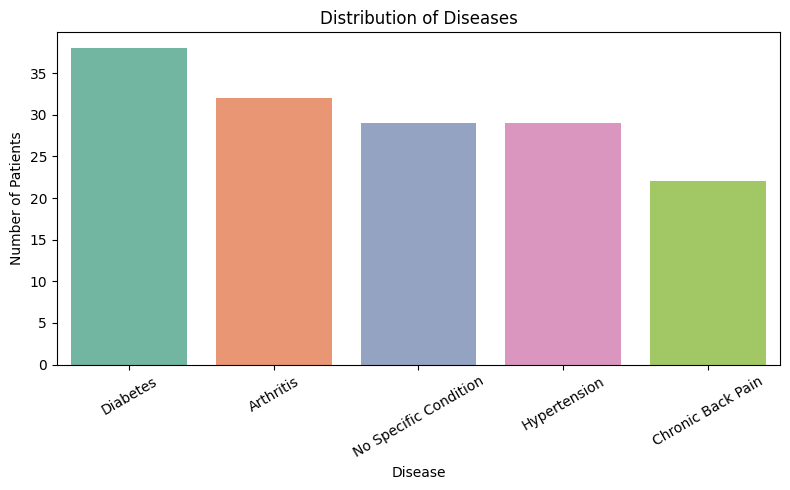

In [133]:
#圖表一：疾病分布（Bar Chart）
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Disease", order=df["Disease"].value_counts().index, palette="Set2")
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Number of Patients")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

此圖表顯示各疾病類型出現的頻率。可以看出某些疾病如 Diabetes 比較常見
，顯示在此資料中，患有 Diabetes的人比例較高

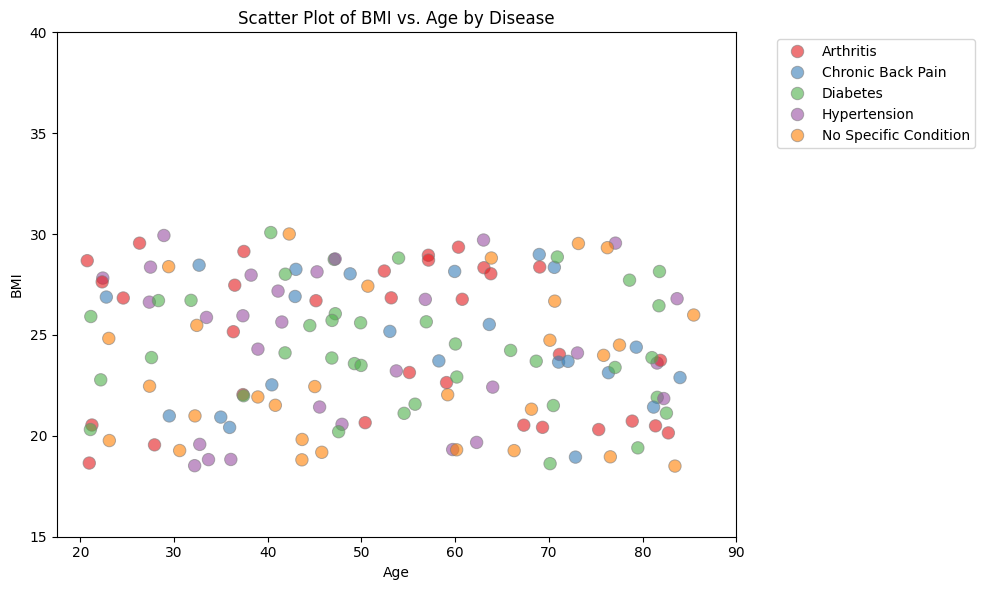

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_jittered = df.copy()
#將 "Age" 和 "BMI" 欄位轉換為數值類型
df_jittered["Age"] = pd.to_numeric(df_jittered["Age"])
df_jittered["BMI"] = pd.to_numeric(df_jittered["BMI"])
df_jittered["Age"] += np.random.uniform(-0.5, 0.5, size=len(df))
df_jittered["BMI"] += np.random.uniform(-0.2, 0.2, size=len(df))


plt.figure(figsize=(10, 6))  # 放大畫布讓標籤有空間
sns.scatterplot(
    data=df_jittered,
    x="Age",
    y="BMI",
    hue="Disease",
    palette="Set1",
    alpha=0.6,
    s=80,
    edgecolor="gray"
)
plt.title("Scatter Plot of BMI vs. Age by Disease")

#明確設定 XY 軸的數值範圍與刻度排序（由小到大）
plt.xticks(np.arange(20, 91, 10))  # Age: 20 到 90，每 10 年
plt.yticks(np.arange(15, 41, 5))   # BMI: 15 到 40，每 5 點

plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 此圖用來探索年齡與 BMI 的關係。觀察結果顯示病患 BMI 分布較分散，並無明顯線性趨勢，但部分慢性病患者的 BMI 明顯偏高，可能與生活型態或年齡相關。

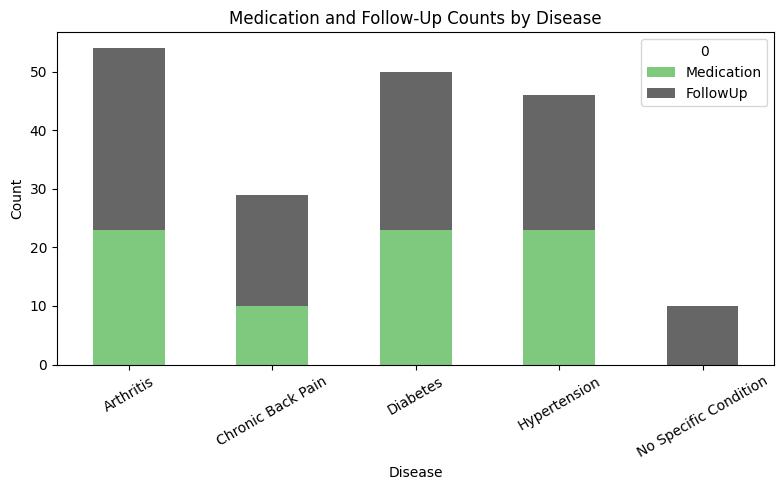

In [135]:
#圖表三：各疾病的用藥與追蹤情況（Stacked Bar Chart）
grouped = df.groupby("Disease")[["Medication", "FollowUp"]].sum().reset_index()
grouped.set_index("Disease", inplace=True)
grouped.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Accent")
plt.title("Medication and Follow-Up Counts by Disease")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

此圖表示不同疾病的用藥與追蹤治療情況。可以看出例如 Arthritis 與 Diabetes 有較高的用藥與追蹤比例，顯示這些病症可能需要長期控制與治療。

<ipython-input-153-3a981b34f7ff>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Disease", y="BMI", data=df, palette="Set2")


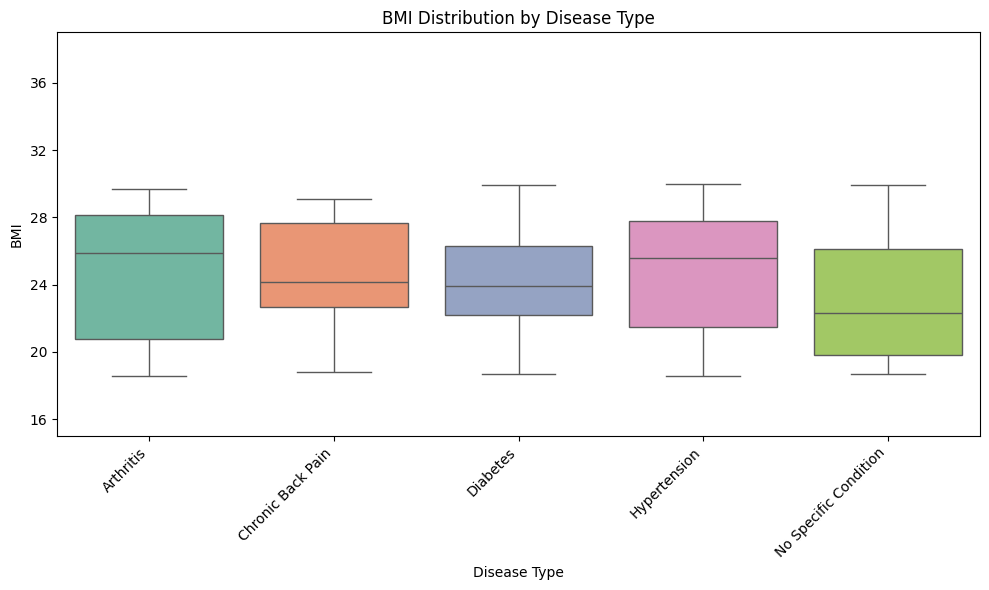

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np

# 1. 確保數值型態
df["BMI"] = pd.to_numeric(df["BMI"])
df["Disease"] = pd.Categorical(df["Disease"], categories=sorted(df["Disease"].unique()), ordered=True)

# 2. 畫布設定
plt.figure(figsize=(10, 6))

# 3. 繪製箱型圖
sns.boxplot(x="Disease", y="BMI", data=df, palette="Set2")

# 4. 軸設定（避免標籤擠在一起）
plt.xticks(rotation=45, ha='right')

# 5. Y 軸從小到大，固定刻度
plt.yticks(np.arange(15, 41, 3))  # 或根據你實際範圍調整
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=False, nbins=6))

# 6. 加上標題和標籤
plt.title('BMI Distribution by Disease Type')
plt.xlabel('Disease Type')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()


從箱型圖可以看出，高 BMI 與多種慢性疾病（如糖尿病和高血壓）之間有一定的關聯。